```{contents}
```
Below is a **clear, runnable demonstration** of **Static Edge behavior in LangGraph**, with execution flow, visualization, and explanation.

---

## **Demonstration — Static Edge Pipeline in LangGraph**

We will build a **pure static pipeline**:

```
Input → Preprocess → Analyze → Postprocess → END
```

No decisions. No branches. No loops.

---

### **1. Define State**

```python
from typing import TypedDict

class State(TypedDict):
    text: str
```

---

### **2. Define Nodes**

```python
def preprocess(state: State):
    print("Preprocess running")
    return {"text": state["text"].lower()}

def analyze(state: State):
    print("Analyze running")
    return {"text": state["text"] + " | analyzed"}

def postprocess(state: State):
    print("Postprocess running")
    return {"text": state["text"] + " | ready"}
```

---

### **3. Build Graph with Static Edges**

```python
from langgraph.graph import StateGraph, END

builder = StateGraph(State)

builder.add_node("pre", preprocess)
builder.add_node("analyze", analyze)
builder.add_node("post", postprocess)

builder.set_entry_point("pre")

builder.add_edge("pre", "analyze")
builder.add_edge("analyze", "post")
builder.add_edge("post", END)

graph = builder.compile()
```

---

### **4. Execute**

```python
result = graph.invoke({"text": "HELLO WORLD"})
print(result)
```

### **Output**

```
Preprocess running
Analyze running
Postprocess running
{'text': 'hello world | analyzed | ready'}
```

**Observation:**
Nodes always execute in the **same order**.

---

### **5. Visualization (Optional)**

```python
from IPython.display import Image, display
display(Image(graph.get_graph().draw_png()))
```

Graph structure:

```
pre ───▶ analyze ───▶ post ───▶ END
```

---

### **6. Why This Is a Static Edge Pipeline**

| Property          | Value    |
| ----------------- | -------- |
| Control flow      | Fixed    |
| Branching         | None     |
| Runtime decisions | None     |
| Optimization      | Maximum  |
| Predictability    | Absolute |

---

### **7. Comparison with Conditional Edge**

If we replaced:

```python
builder.add_edge("analyze", "post")
```

with:

```python
builder.add_conditional_edges("analyze", router, {...})
```

the pipeline would become **dynamic**.

But with static edges, the execution graph is a **deterministic pipeline**.

---

### **Mental Model**

> **Static edges behave like compiled code — the path is already decided before execution.**


### Demonstration

In [1]:
from typing import TypedDict

class State(TypedDict):
    text: str

def preprocess(state: State):
    return {"text": state["text"].lower()}

def analyze(state: State):
    return {"text": state["text"] + " | analyzed"}

def postprocess(state: State):
    return {"text": state["text"] + " | ready"}


In [2]:
from langgraph.graph import StateGraph, END

builder = StateGraph(State)

builder.add_node("pre", preprocess)
builder.add_node("analyze", analyze)
builder.add_node("post", postprocess)

builder.set_entry_point("pre")
builder.add_edge("pre", "analyze")
builder.add_edge("analyze", "post")
builder.add_edge("post", END)

graph = builder.compile()


In [3]:
graph.invoke({"text": "HELLO"})


{'text': 'hello | analyzed | ready'}

### Multi AGent Workflows

Supervisor → Research Agent ─┐
             Compute Agent ──┼→ Aggregator → END
             Verify Agent ───┘


In [4]:
class AgentState(TypedDict):
    query: str
    research: str
    compute: str
    verify: str
    answer: str

def research_agent(state: AgentState):
    return {"research": f"Facts about {state['query']}"}

def compute_agent(state: AgentState):
    return {"compute": "Numerical analysis complete"}

def verify_agent(state: AgentState):
    return {"verify": "Verified for correctness"}

def aggregator(state: AgentState):
    return {
        "answer": f"{state['research']} | {state['compute']} | {state['verify']}"
    }



In [5]:
builder = StateGraph(AgentState)

builder.add_node("research", research_agent)
builder.add_node("compute", compute_agent)
builder.add_node("verify", verify_agent)
builder.add_node("aggregate", aggregator)

builder.set_entry_point("research")

builder.add_edge("research", "compute")
builder.add_edge("compute", "verify")
builder.add_edge("verify", "aggregate")
builder.add_edge("aggregate", END)

multi_agent_graph = builder.compile()


In [6]:
multi_agent_graph.invoke({"query": "climate change"})


{'query': 'climate change',
 'research': 'Facts about climate change',
 'compute': 'Numerical analysis complete',
 'verify': 'Verified for correctness',
 'answer': 'Facts about climate change | Numerical analysis complete | Verified for correctness'}

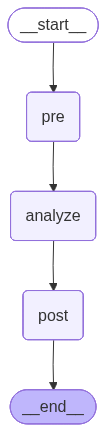

In [7]:
from IPython.display import Image
Image(graph.get_graph().draw_mermaid_png())